In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [12]:
def vwin(samples):
    win = np.ones((samples))
    for i in range(samples):
        win[i] = np.sin((i + 0.5) * (np.pi / (2.0 * samples)))
    return win
        
def apply_window(prev_size, curr_size, next_size, prev_win, next_win):
    samples = np.ones((curr_size * 2))
    bound = int(curr_size / 2 - prev_size / 2)

    for i in range(bound):
        samples[i] = 0

    for i in range(prev_size):
        x = i + bound
        samples[x] *= prev_win[i]

    bound = curr_size
    for i in range(next_size):
        x = i + bound
        samples[x] *= next_win[next_size - 1 - i]

    bound += next_size
    for i in range(2 * curr_size - bound):
        x = i + bound
        samples[x] = 0
    return samples

short_win = vwin(128)
long_win = vwin(1024)

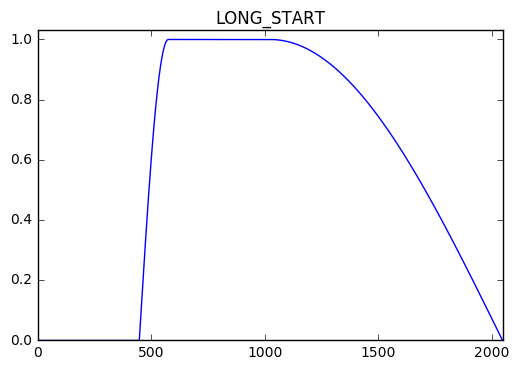

In [13]:
prev_size = 128
curr_size = 1024
next_size = 1024
prev_win = short_win
next_win = long_win
samples = apply_window(prev_size, curr_size, next_size, prev_win, next_win)
plt.plot(samples)
plt.title('LONG_START')
plt.axis((0, 2048, 0, 1.03))
plt.show()

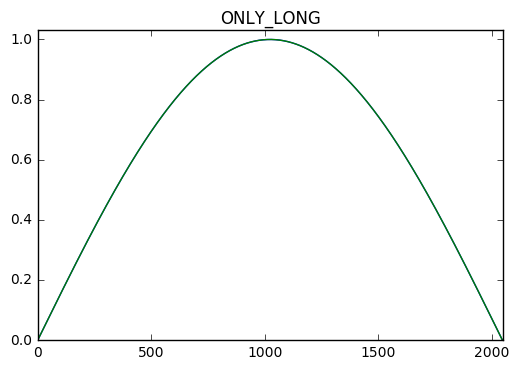

In [15]:
prev_size = 1024
curr_size = 1024
next_size = 1024
prev_win = long_win
next_win = long_win
samples = apply_window(prev_size, curr_size, next_size, prev_win, next_win)
plt.plot(samples)
plt.title('ONLY_LONG')
plt.axis((0, 2048, 0, 1.03))
plt.show()

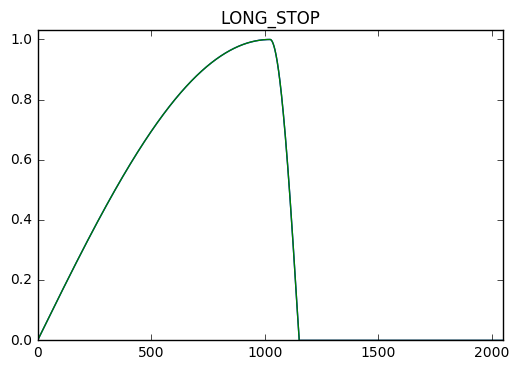

In [17]:
prev_size = 1024
curr_size = 1024
next_size = 128
prev_win = long_win
next_win = short_win
samples = apply_window(prev_size, curr_size, next_size, prev_win, next_win)
plt.plot(samples)
plt.title('LONG_STOP')
plt.axis((0, 2048, 0, 1.03))
plt.show()

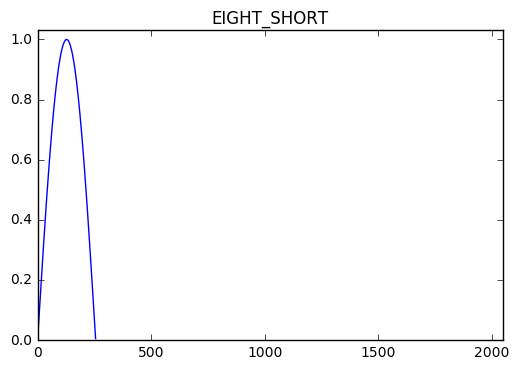

In [19]:
prev_size = curr_size = next_size = 128
prev_win = next_win = short_win
samples = apply_window(prev_size, curr_size, next_size, prev_win, next_win)
plt.plot(samples)
plt.title('EIGHT_SHORT')
plt.axis((0, 2048, 0, 1.03))
plt.show()